In [18]:
import numpy as np
import torch
import pandas as pd
from smart_open import open
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
class ImageNetDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file_path, transform=None):
        self.csv_file_path = csv_file_path
        self.df = pd.read_csv(csv_file_path)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row['path']
        with open(img_path, 'rb') as f:
            img = Image.open(f).convert('RGB')
            # img = img.resize((224, 224))
            img = np.array(img)
        if self.transform:
            img = self.transform(img)
        return img, row['label']

In [15]:
train_ds = ImageNetDataset('imagenet_train.csv')

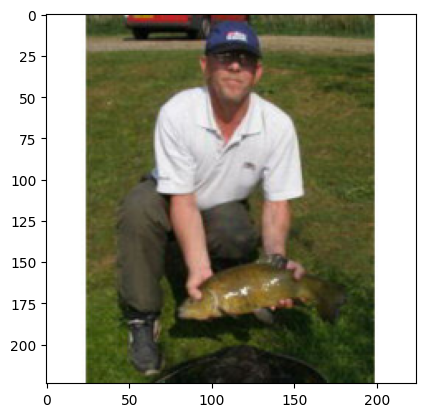

In [19]:
plt.imshow(train_ds[0][0])
